In [1]:
from analysis import AnalysisTargets, ClusterFinancials
from data import FinancialsData
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cf = ClusterFinancials()
gmm = list(cf.gmm.cluster())
cluster_count = max(set([i[1] for i in gmm]))
gmm_dict = dict()
for i in range(0, cluster_count + 1):
    gmm_dict[i] = []
for i in gmm:
    gmm_dict[i[1]].append(i[0])
for k in gmm_dict:
    df = pd.DataFrame()
    at = AnalysisTargets()
    for symbol in gmm_dict[k]:
        df = pd.concat([df, at.create_target_dataset(symbol)])
    print(f"Cluster {k+1}:\n{gmm_dict[k]}")
    print(df.describe())

Cluster 1:
['MCD', 'NKE', 'PM', 'SBUX', 'MDLZ', 'DEO', 'MO', 'BTI', 'CL', 'CMG', 'ORLY', 'GIS', 'KHC', 'ABEV', 'AZO', 'LVS', 'DHI', 'LEN', 'K', 'QSR', 'TCOM', 'CAG', 'SJM', 'CPB', 'TAP', 'HTHT', 'ARMK']
               Open          High           Low         Close     Adj Close  \
count  13581.000000  13581.000000  13581.000000  13581.000000  13581.000000   
mean     233.380617    235.959686    230.839014    233.513551    231.814483   
std      491.629085    497.160395    486.171961    491.979355    492.416831   
min        2.430000      2.450000      2.400000      2.440000      2.324491   
25%       41.349998     41.799999     40.910000     41.360001     39.708405   
50%       67.139999     67.660004     66.510002     67.139999     65.899284   
75%      116.260002    117.290001    115.339996    116.379997    114.000000   
max     2736.090088   2750.000000   2714.419922   2733.649902   2733.649902   

             Volume  Rolling Change     Deviation  
count  1.358100e+04    13581.0000

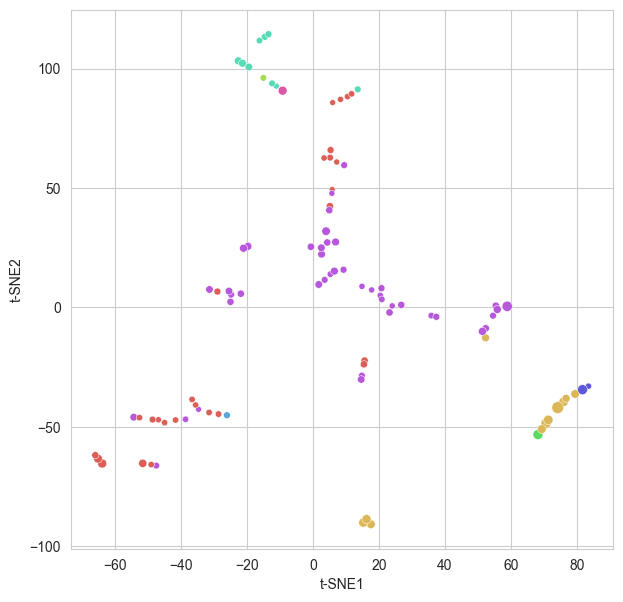

In [3]:
fd = FinancialsData()
results = cf.tsne.reduce(perplexity=2, n_iter=5000)
df = pd.DataFrame(columns=["t-SNE1", "t-SNE2", "AvgVolatility", "Sector", "Cluster", "Industry"])
df["t-SNE1"] = results[:, 0]
df["t-SNE2"] = results[:, 1]
#df["MarketCap"] = fd.get_yfinance_data()["DilutedEPS"]
df["Sector"] = fd.get_yfinance_data()["Sector"]
df["Industry"] = fd.get_yfinance_data()["Sector"]
df["Symbol"] = fd.get_yfinance_data().symbol
cluster_assignments = [i[1] for i in cf.gmm.cluster()]
for k, v in cf.gmm.cluster():
     df.loc[(df["Symbol"] == k), "Cluster"] = v
for i in df["Symbol"]:
    at = AnalysisTargets()
    mean = at.create_target_dataset(i)['Deviation'].mean()
    df.loc[(df["Symbol"] == i), "AvgVolatility"] = mean
num_colors = len(set(df["Cluster"]))
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="t-SNE1",
    y="t-SNE2",
    hue="Cluster",
    size="AvgVolatility",
    data=df,
    palette=sns.color_palette("hls", num_colors),
    legend=False,
)
plt.show()

In [4]:

ideal_clusters = cf.gmm.cluster_probabilities()
cf.gmm.ideal_cluster_num()

4